# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision',3)

# 2. Importing Power Generation & Weather Sensor Data

In [3]:
generation_data = pd.read_csv('Plant_2_Generation_Data.csv')

In [4]:
weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

In [5]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
36445,2020-06-03 04:30:00,4136001,PeE6FRyGXUgsRhN,0.000000,0.000000,0.000000,1348468316.000000
20368,2020-05-25 20:45:00,4136001,Mx2yZCDsyf6DPfv,0.000000,0.000000,9167.000000,2540159.000000
53545,2020-06-11 07:00:00,4136001,oZ35aAeoifZaQzV,91.500000,88.835714,26.428571,1660160729.428572
52159,2020-06-10 15:15:00,4136001,oZ35aAeoifZaQzV,313.150000,307.785714,5011.214286,1660160129.214286
26983,2020-05-29 16:45:00,4136001,Mx2yZCDsyf6DPfv,528.678571,518.235714,7855.785714,2570360.785714


In [6]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2726,2020-06-12 10:45:00,4136001,iq8k7ZNt4Mwm3w0,26.212235,29.820672,0.195403
2241,2020-06-07 09:30:00,4136001,iq8k7ZNt4Mwm3w0,29.140062,49.170935,0.812559
2866,2020-06-13 21:45:00,4136001,iq8k7ZNt4Mwm3w0,24.633419,23.544276,0.000000
1131,2020-05-26 19:15:00,4136001,iq8k7ZNt4Mwm3w0,32.221992,30.624296,0.000000
3219,2020-06-17 14:00:00,4136001,iq8k7ZNt4Mwm3w0,29.044236,42.326256,0.480736


# 3. Adjust datetime format

In [7]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


# 4. Merging generation data and weather sensor data

In [8]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
45339,2020-06-07 09:45:00,oZ35aAeoifZaQzV,1143.573333,1115.586667,1319.400000,1660136048.400000,30.203821,53.473844,0.846723
50620,2020-06-09 21:45:00,oZZkBaNadn6DNKz,0.000000,0.000000,7902.000000,1708251021.000000,26.803884,25.722328,0.000000
29022,2020-05-30 16:00:00,4UPUqMRk7TRMgml,703.873333,689.313333,7399.600000,2545081.600000,36.552450,45.959262,0.469286
45882,2020-06-07 16:00:00,NgDl19wMapZy17u,277.571429,272.114286,7184.714286,111690447.714286,32.030421,37.551644,0.173917
25753,2020-05-28 23:30:00,Quc1TzYxW2pYoWX,0.000000,0.000000,4863.000000,329570861.000000,27.310156,25.976536,0.000000


# 5. Adding separate time and date columns

In [9]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month

# Use isocalendar() to get ISO calendar year, week number, and weekday
df_solar['YEAR'],df_solar['WEEK'], _ = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().values.T

# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)


,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,YEAR,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.0,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15


In [10]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  YEAR                 67698 non-

In [11]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
YEAR                   0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [12]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,MINUTES,TOTAL MINUTES PASS
count,67698,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000,67698.000000
mean,2020-06-01 10:44:33.650625024,246.701961,241.277825,3294.890295,658944788.423766,27.986756,32.607233,0.229204,15.530680,5.529705,22.517061,714.329522
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,0.000000,20.942385,20.265123,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2020-05-23 21:00:00,0.000000,0.000000,272.750000,19964944.866667,24.570349,23.685627,0.000000,9.000000,5.000000,15.000000,360.000000
50%,2020-06-01 23:00:00,0.000000,0.000000,2911.000000,282627587.000000,26.910352,27.433723,0.018554,16.000000,6.000000,30.000000,720.000000
75%,2020-06-09 23:30:00,446.591667,438.215000,5534.000000,1348495113.000000,30.912601,40.019036,0.431027,22.000000,6.000000,45.000000,1080.000000
max,2020-06-17 23:45:00,1420.933333,1385.420000,9873.000000,2247916295.000000,39.181638,66.635953,1.098766,31.000000,6.000000,45.000000,1425.000000
std,nan,370.569597,362.112118,2919.448386,729667771.073221,4.021294,11.226446,0.309365,8.527546,0.499120,16.764084,415.672274


# 6. Converting 'SOURCE_KEY' from categorical form to numerical form

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,YEAR,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,2020-05-15,4UPUqMRk7TRMgml,0.0,0.0,9425.000,2.429e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15,0
1,2020-05-15,81aHJ1q11NBPMrL,0.0,0.0,0.000,1.215e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15,1
2,2020-05-15,9kRcWv60rDACzjR,0.0,0.0,3075.333,2.248e+09,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15,2
3,2020-05-15,Et9kgGMDl729KT4,0.0,0.0,269.933,1.704e+06,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15,3
4,2020-05-15,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000,1.994e+07,27.005,25.061,0.0,2020-05-15,00:00:00,15,5,2020,20,0,0,0,2020-05-15,4


# Data Visualization:

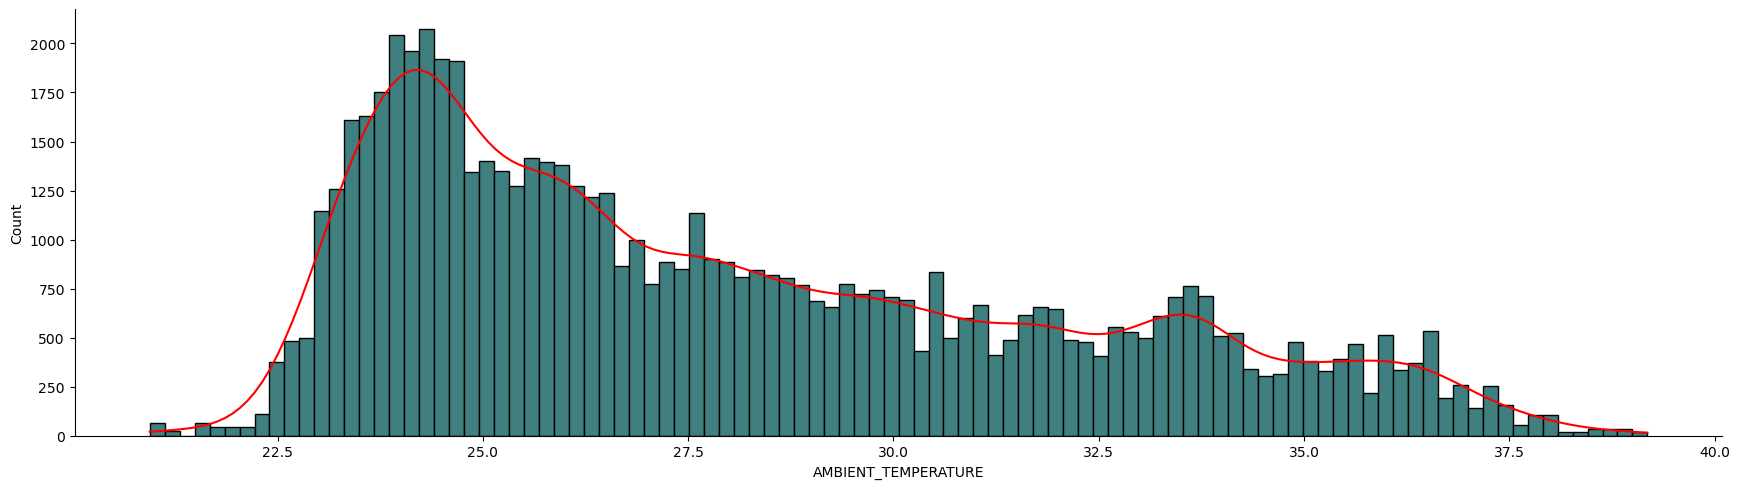

In [14]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [15]:
df_solar['DATE'].nunique()

34

# Faults & Abnormalities detection in solar power plant generation

# 7. Multiple Plotting of DC_POWER generation on per day basis.

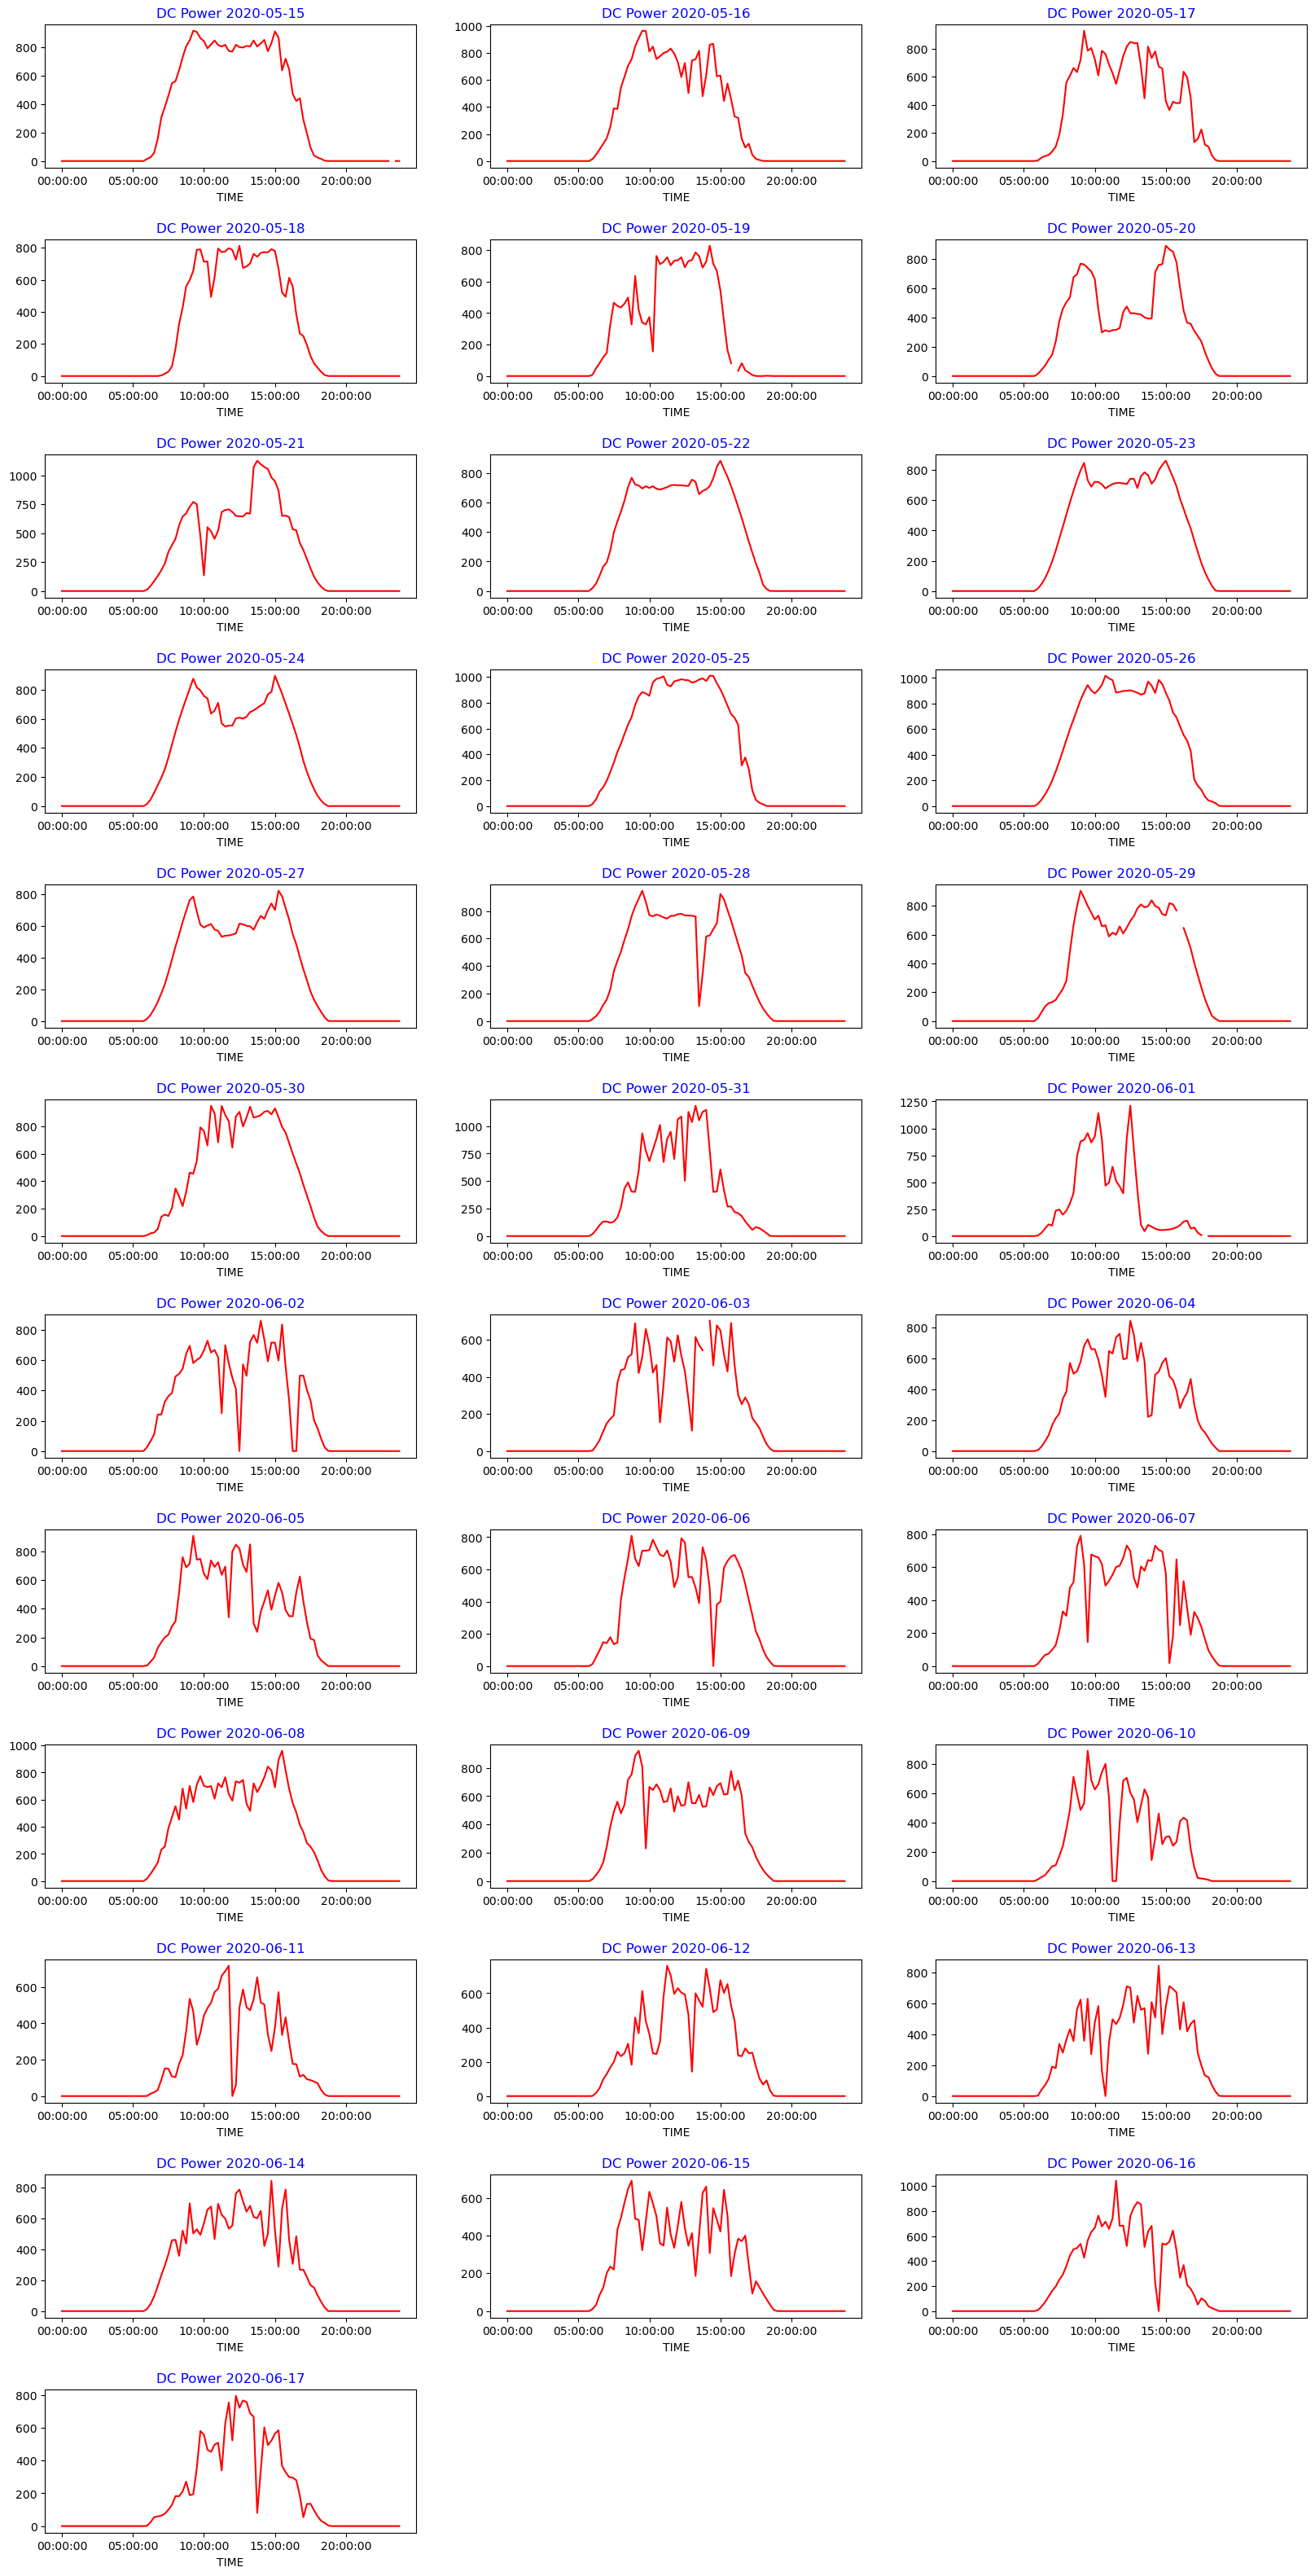

In [16]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_dc, row=12, col=3)

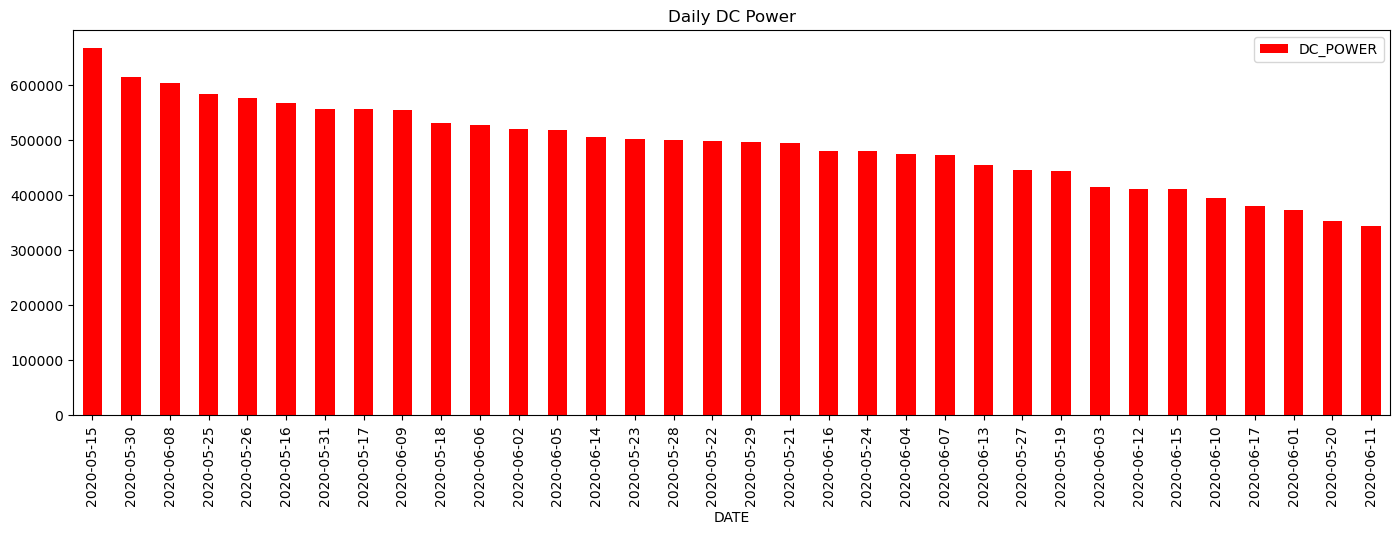

In [17]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

# 8. Multiple Plotting of IRRADIATION generation on per day basis

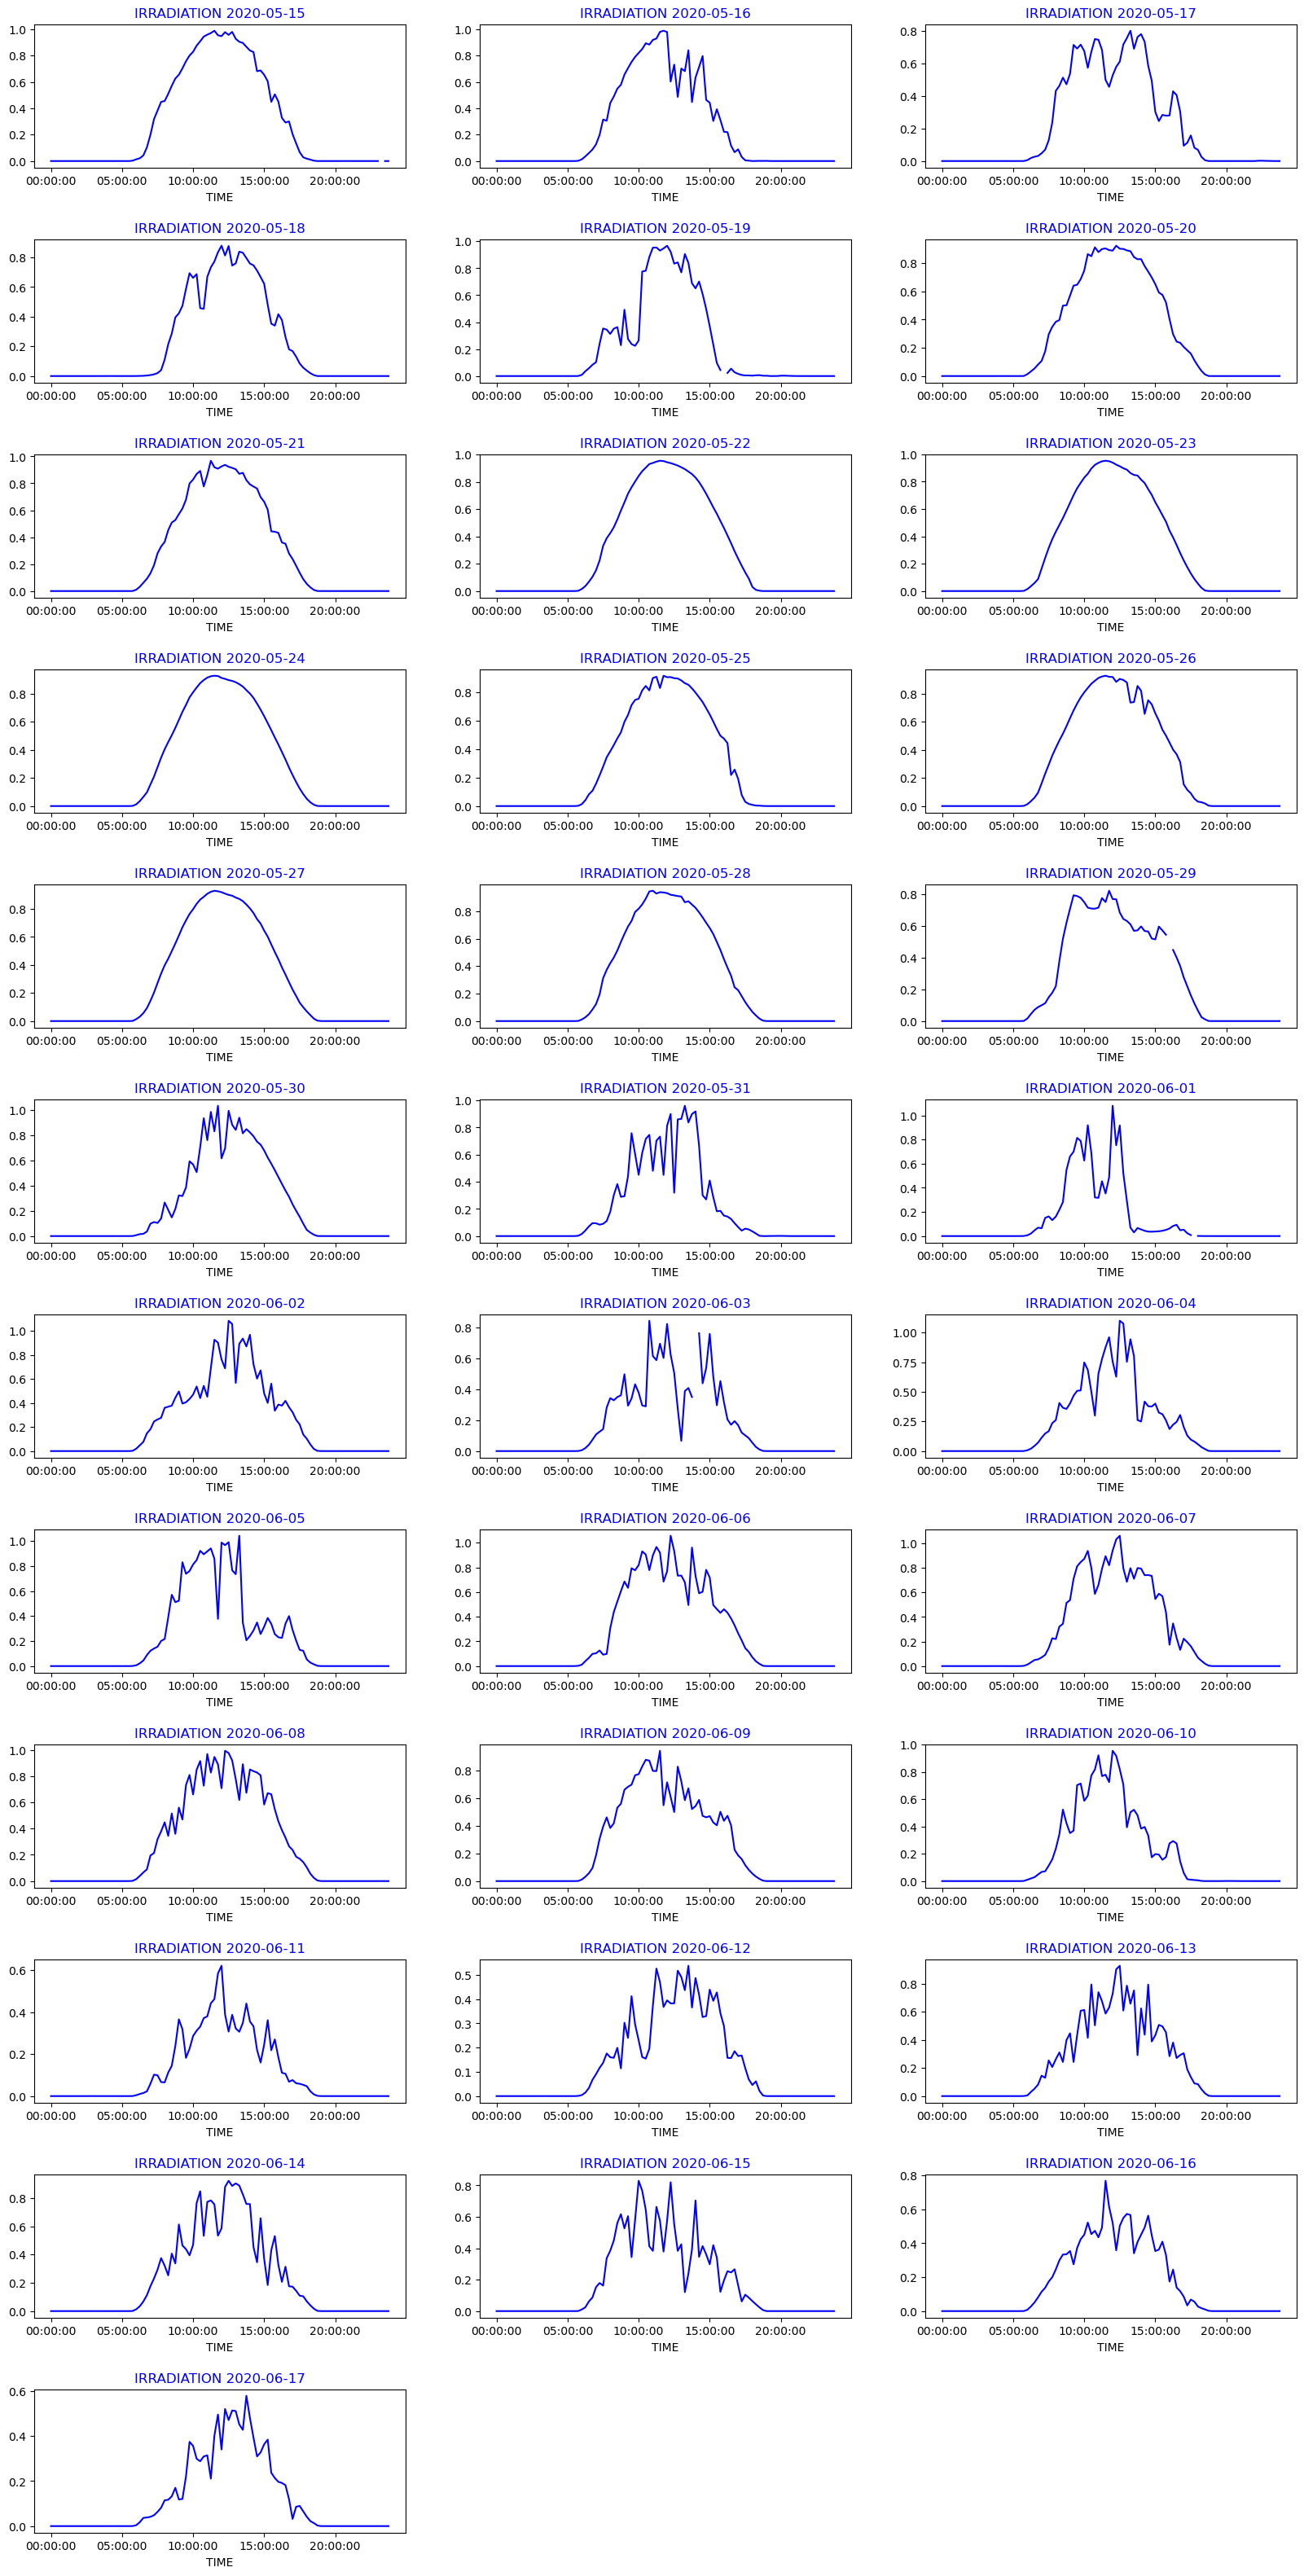

In [18]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)

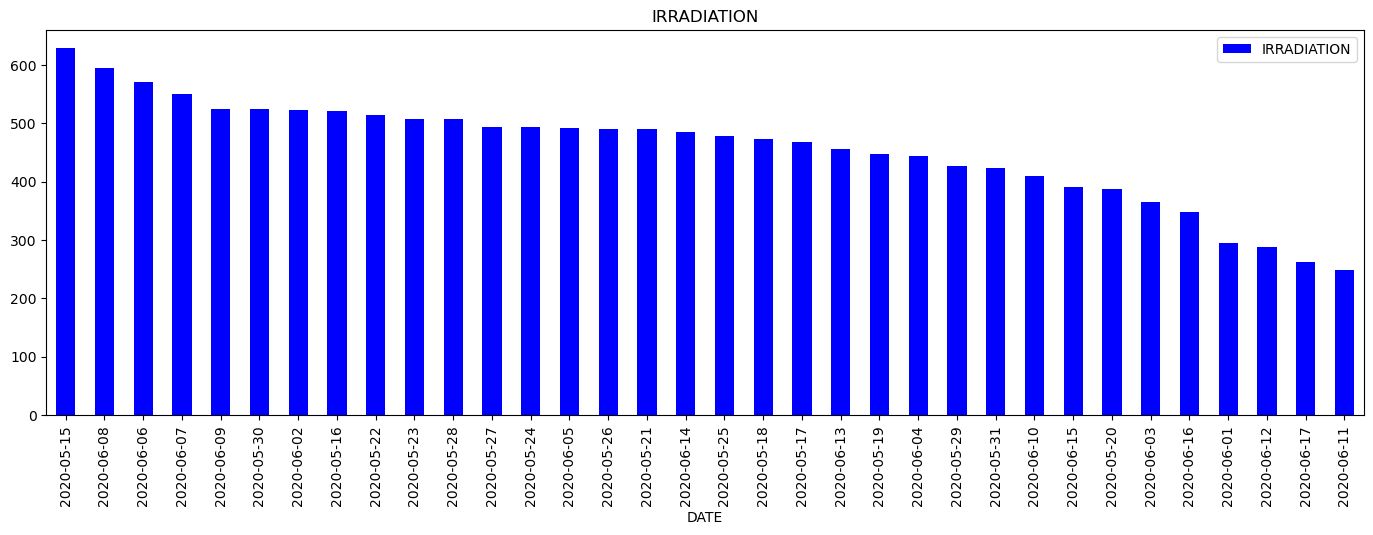

In [19]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

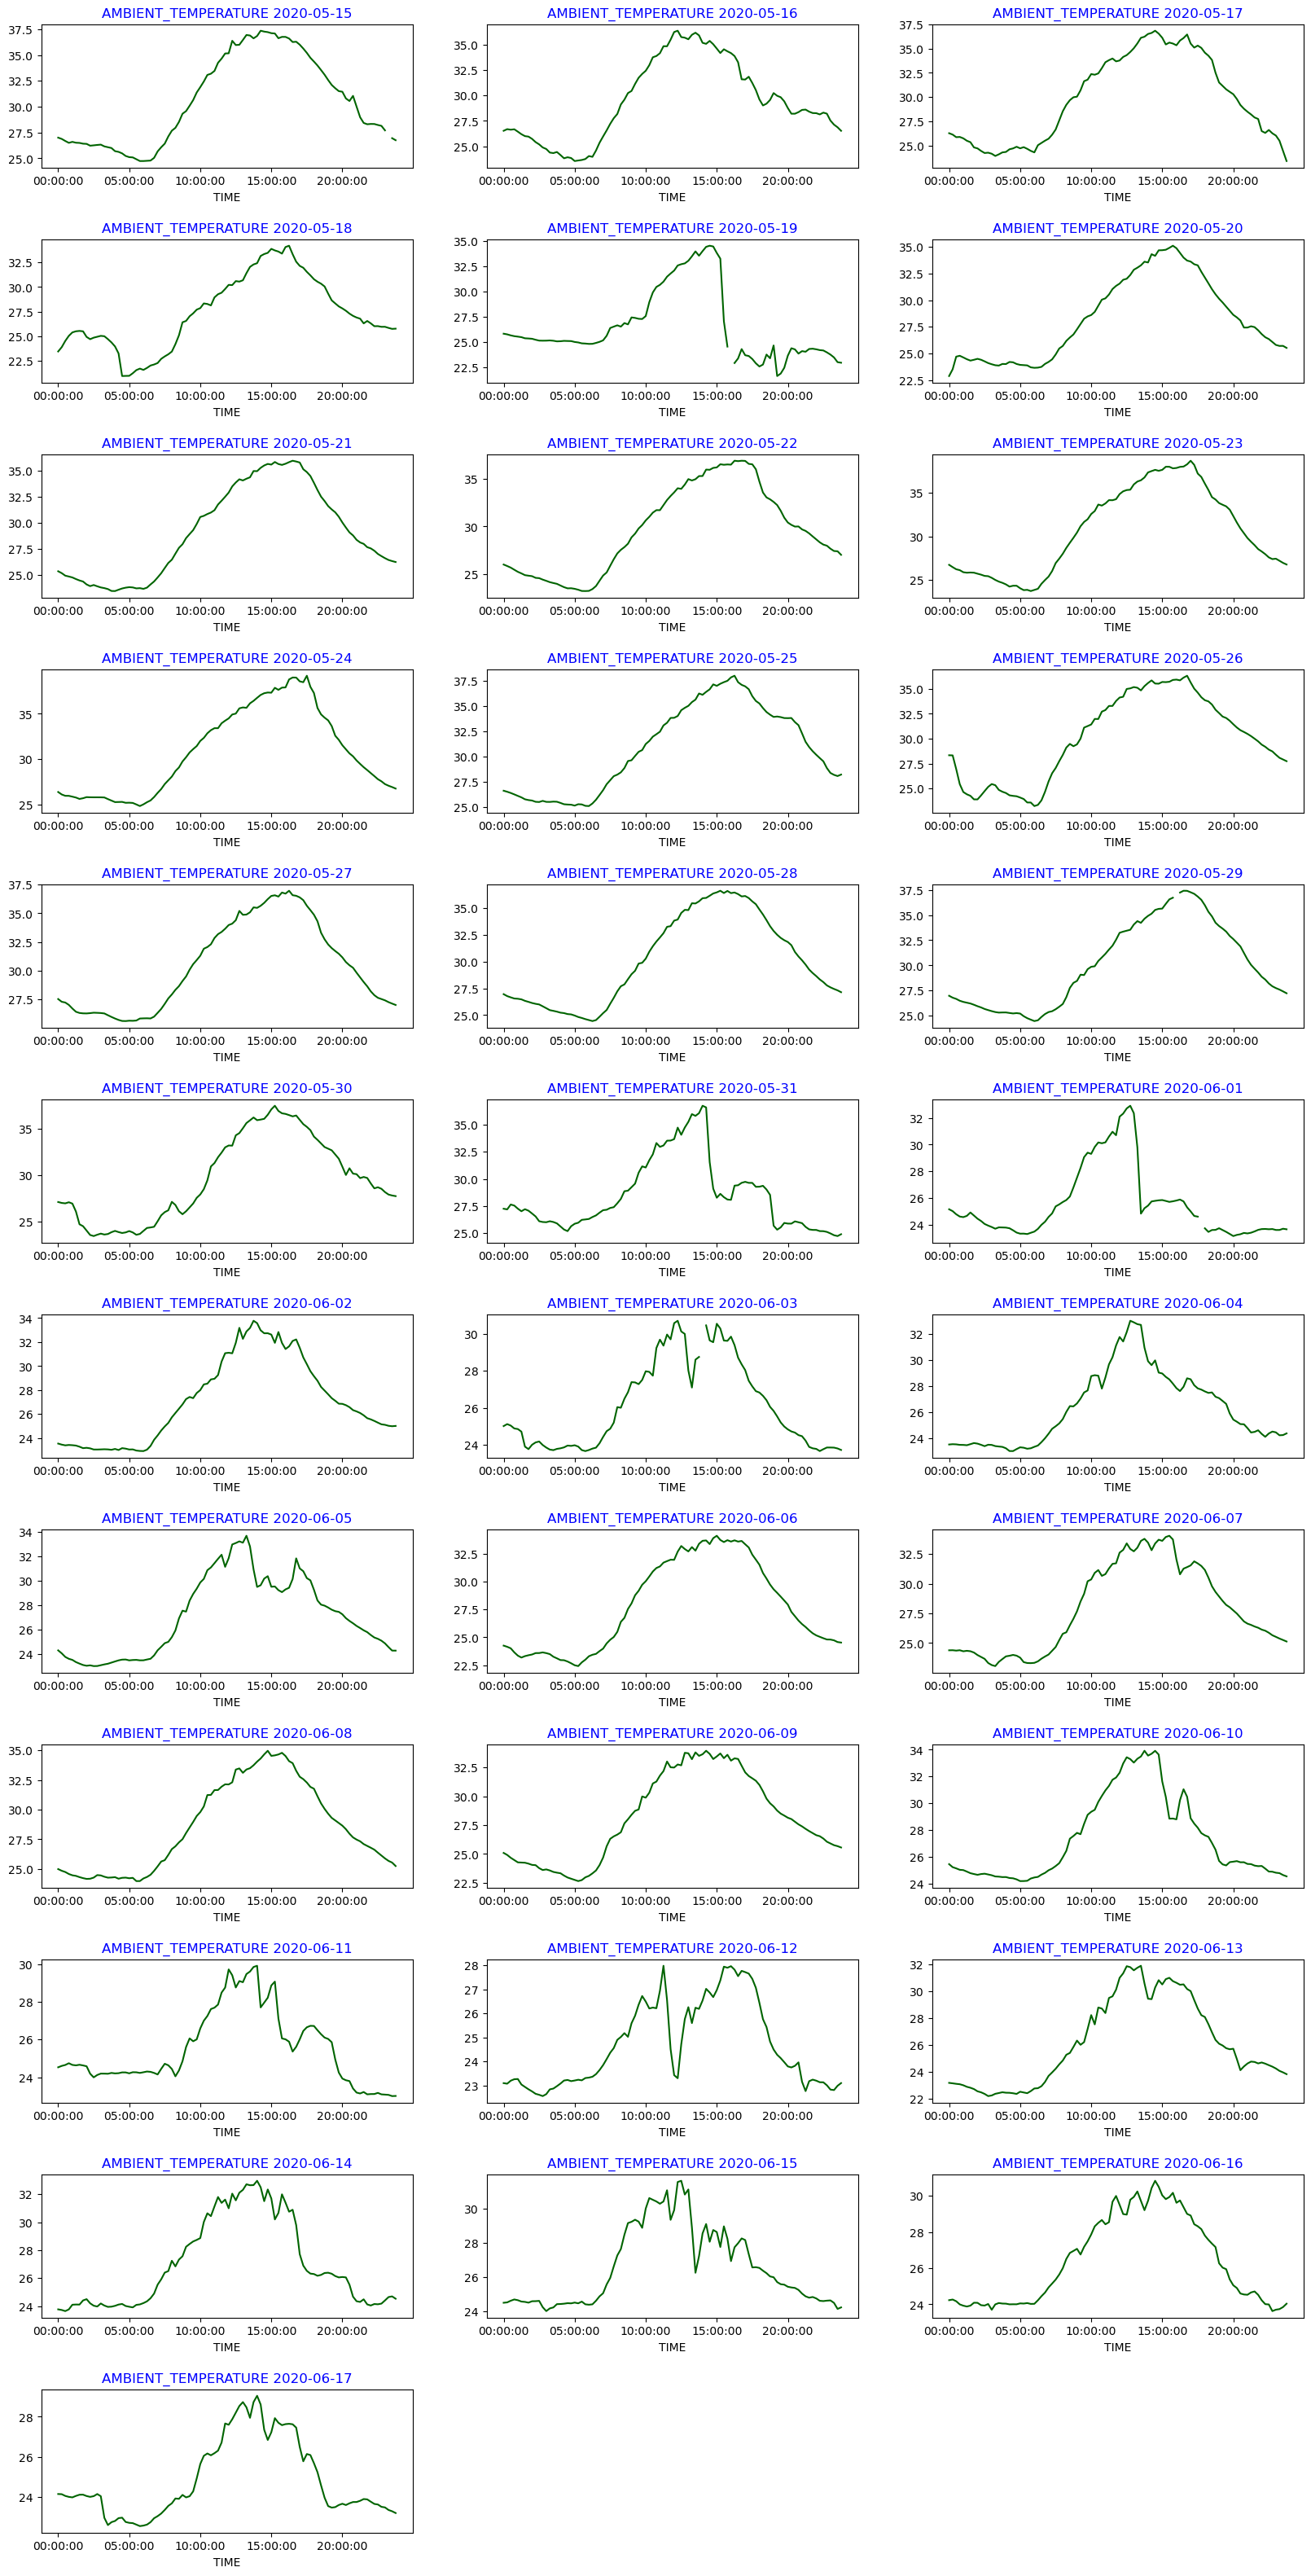

In [20]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

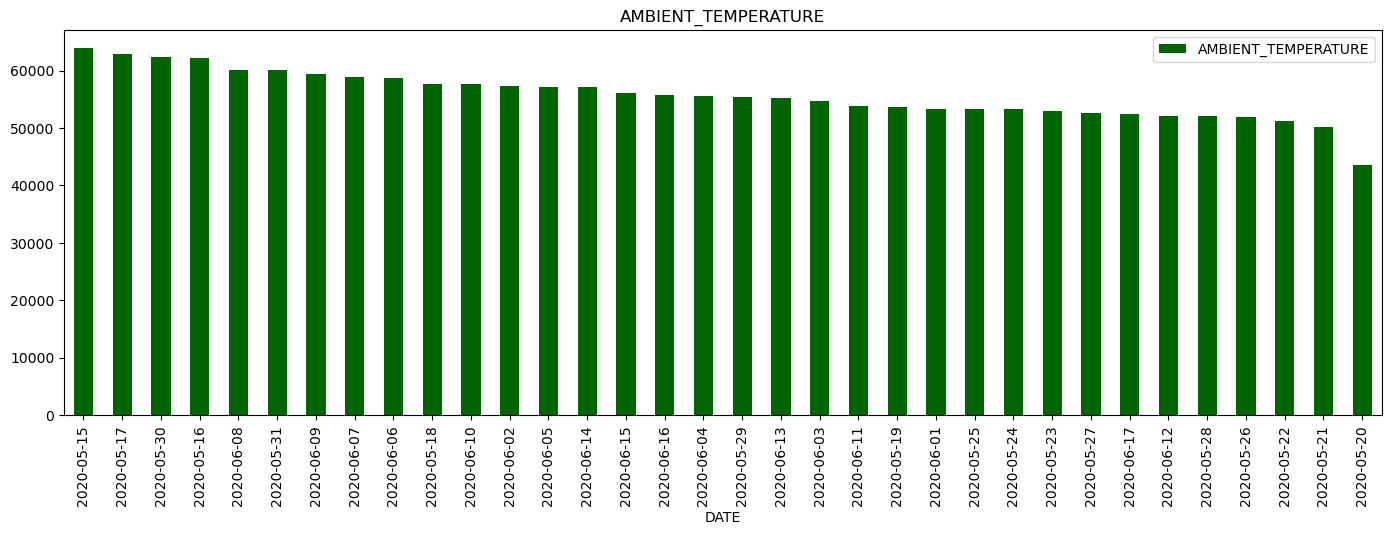

In [21]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkgreen')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# Best and Worst Power generation comparision:

# 9. Highest average DC_POWER is generated on "2020-05-15"

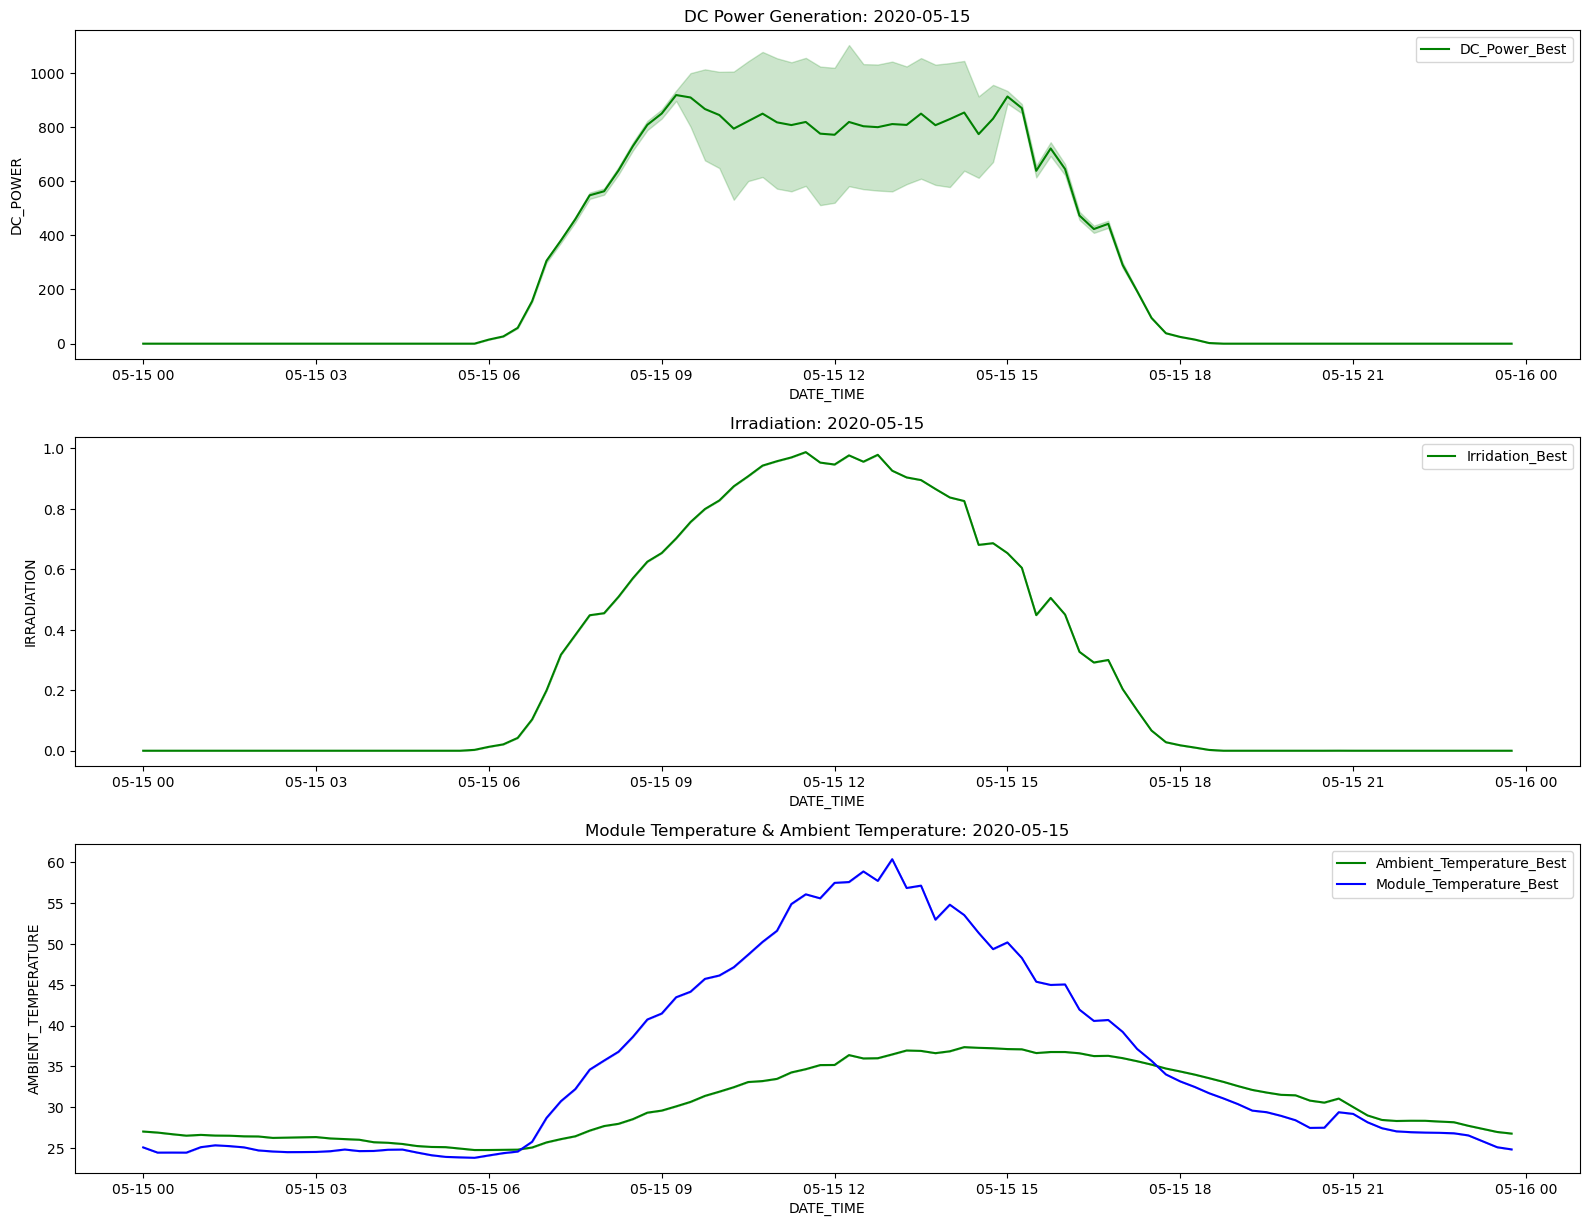

In [22]:
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="IRRADIATION", label="Irridation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="AMBIENT_TEMPERATURE", label="Ambient_Temperature_Best", color='green')
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="MODULE_TEMPERATURE", label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


# 10. Lowest average DC_POWER is generated on "2020-06-11"

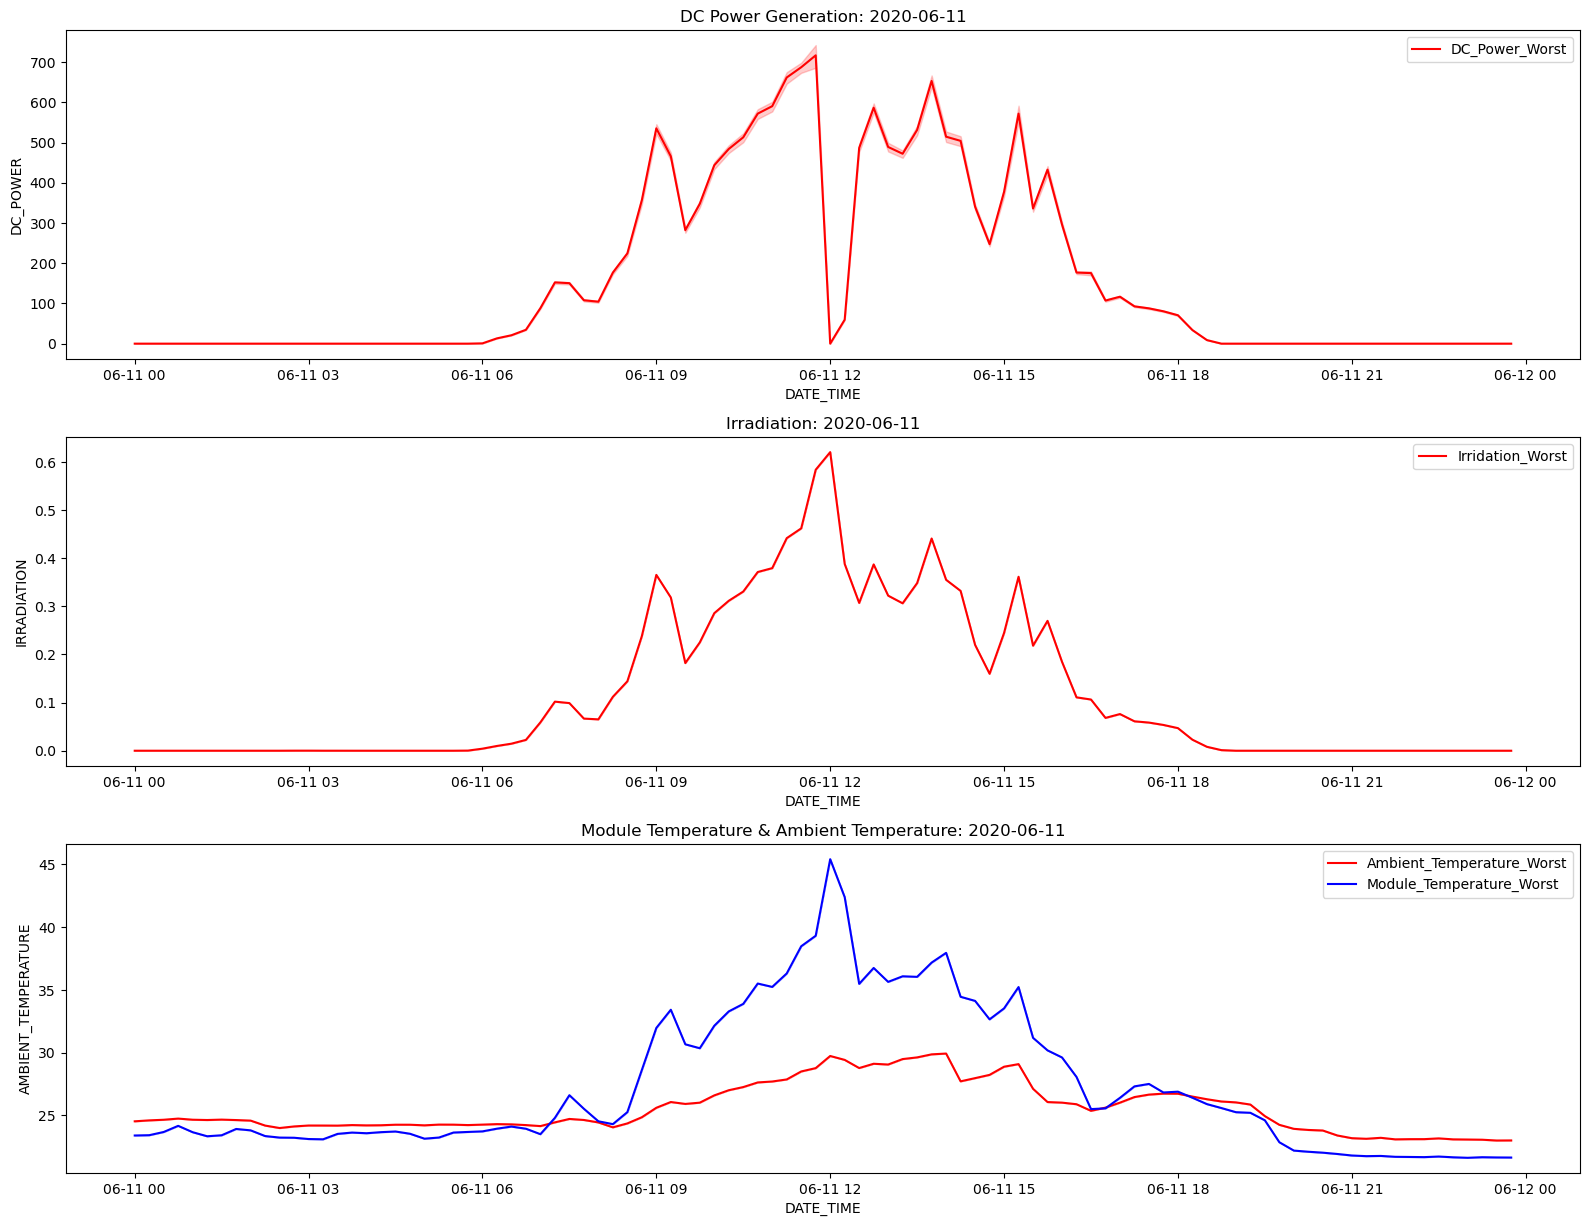

In [23]:
date = ["2020-06-11"]
plt.figure(figsize=(16, 16))

plt.subplot(411)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="DC_POWER", label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="IRRADIATION", label="Irridation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="AMBIENT_TEMPERATURE", label="Ambient_Temperature_Worst", color='red')
sns.lineplot(data=df_solar[df_solar["DATE_STRING"].isin(date)], x="DATE_TIME", y="MODULE_TEMPERATURE", label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


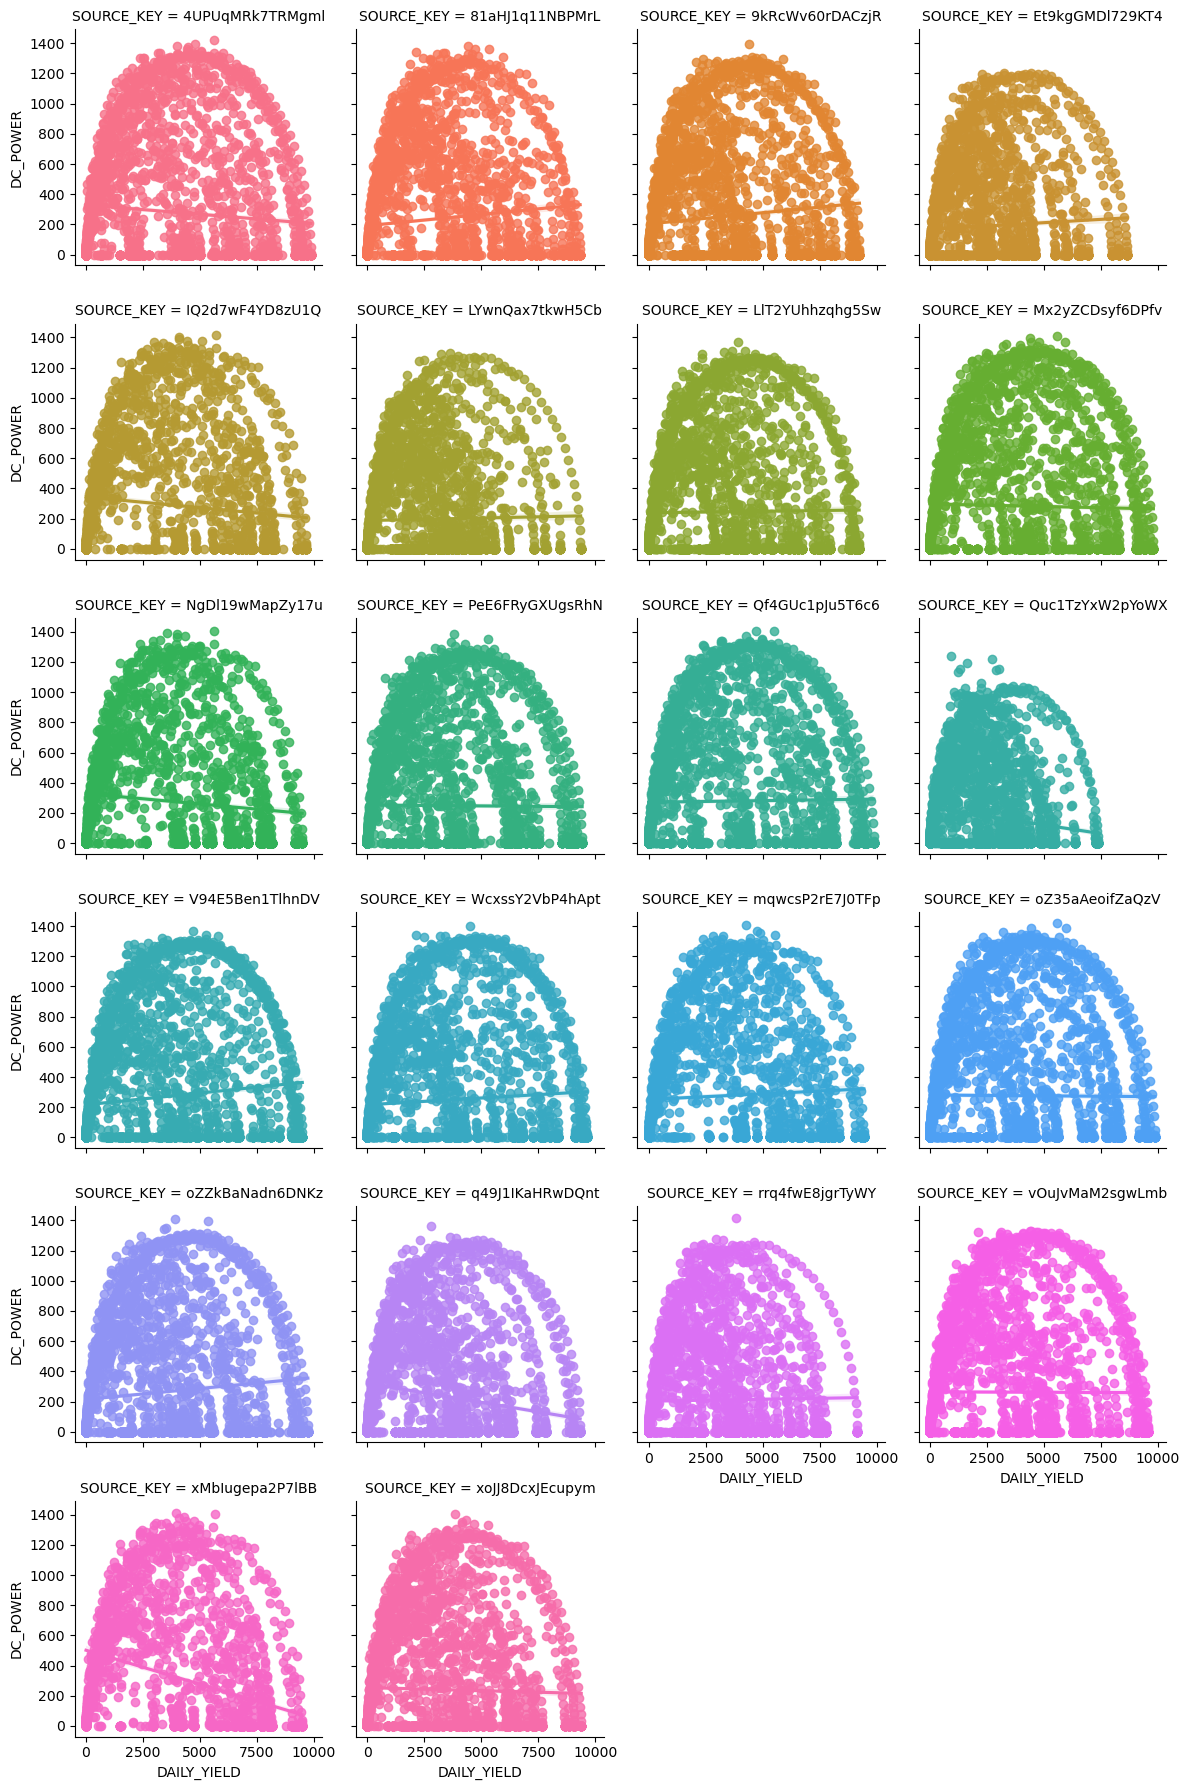

In [24]:
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=df_solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation

In [25]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [26]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [27]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [28]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

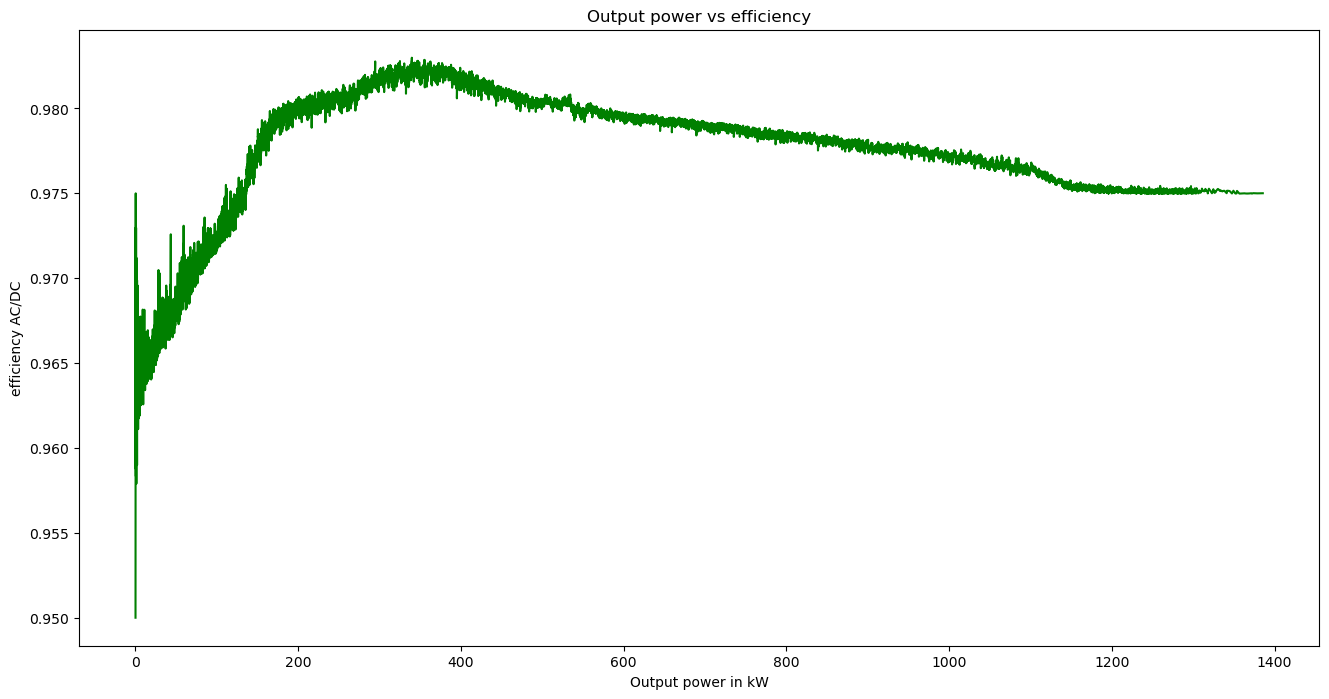

In [29]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# 11. Machine learning model capable of forecasting solar energy production

In [30]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [31]:
X.head()

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER
0,9425.000,2.429e+06,27.005,25.061,0.0,0.0
1,0.000,1.215e+09,27.005,25.061,0.0,0.0
2,3075.333,2.248e+09,27.005,25.061,0.0,0.0
3,269.933,1.704e+06,27.005,25.061,0.0,0.0
4,3177.000,1.994e+07,27.005,25.061,0.0,0.0


In [32]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

# 1. LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


# 2. RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


# 3. DecisionTreeRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


# 12. Result Prediction

In [38]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.76287619 ...    0.         1007.18387143
    0.        ]


In [39]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

,Actual,Predicted
40426,0.000,0.000
50974,0.000,0.000
53919,684.913,684.763
2384,0.000,0.000
22014,0.000,0.000


In [40]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

,Actual,Predicted,Error
40426,0.000,0.000,0.00
50974,0.000,0.000,0.00
53919,684.913,684.763,0.15
2384,0.000,0.000,0.00
22014,0.000,0.000,0.00


In [41]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted,Error
59120,0.000000,0.000000,0.000000
23826,0.000000,0.000000,0.000000
37639,38.120000,38.121786,-0.001786
12637,785.106667,784.983051,0.123616
1355,883.126667,882.840500,0.286167
8417,0.000000,0.000000,0.000000
2926,974.271429,973.898205,0.373224
67009,306.806667,306.907676,-0.101010
39548,277.760000,277.686581,0.073419
23559,331.320000,330.968605,0.351395


In [42]:
pip install pvlib

Note: you may need to restart the kernel to use updated packages.


# 13. Suggestion for the best solar panel angles
# that allows users to input their location and receive energy forecasts and
# panel angle recommendations

In [43]:
import pvlib

# Function to calculate solar elevation angle
def calculate_solar_elevation(latitude, longitude, date_time):
    location = pvlib.location.Location(latitude, longitude)
    solar_position = location.get_solarposition(date_time)
    solar_elevation = solar_position['elevation']
    return solar_elevation

# Function to determine optimal tilt angle based on latitude
def optimal_tilt_angle(latitude):
    return latitude  # Assuming optimal tilt angle is equal to latitude for fixed solar panels

# Function to adjust optimal tilt angle based on seasonal variation
def adjust_tilt_angle_for_season(latitude, month):
    if month in [12, 1, 2]:  # Winter months (December, January, February)
        return latitude + 10  # Increase tilt angle by 10 degrees for better winter sun capture
    elif month in [6, 7, 8]:  # Summer months (June, July, August)
        return latitude - 10  # Decrease tilt angle by 10 degrees for better summer ventilation
    else:
        return latitude  # Use the original tilt angle for other months

# Calculate daily optimal tilt angle
def daily_optimal_tilt_angle(latitude, longitude, date_time):
    solar_elevation = calculate_solar_elevation(latitude, longitude, date_time)
    month = date_time.month
    tilt_angle = optimal_tilt_angle(latitude)
    tilt_angle = adjust_tilt_angle_for_season(tilt_angle, month)
    return tilt_angle + solar_elevation

# Generate suggestions for best solar panel angles for each day of the year
latitude = 37.7749  # Example latitude (San Francisco)
longitude = -122.4194  # Example longitude (San Francisco)
start_date = pd.Timestamp('2020-05-15')
end_date = pd.Timestamp('2020-06-17')

solar_panel_angles = []
dates = pd.date_range(start_date, end_date)
for date in dates:
    angle = daily_optimal_tilt_angle(latitude, longitude, date)
    solar_panel_angles.append((date, angle))

# Print the suggested solar panel angles for each day of the year
for date, angle in solar_panel_angles:
    print(f"Date: {date}, Suggested the best solar panel angles: {angle} degrees")


Date: 2020-05-15 00:00:00, Suggested the best solar panel angles: 2020-05-15    73.889
Name: elevation, dtype: float64 degrees
Date: 2020-05-16 00:00:00, Suggested the best solar panel angles: 2020-05-16    74.021
Name: elevation, dtype: float64 degrees
Date: 2020-05-17 00:00:00, Suggested the best solar panel angles: 2020-05-17    74.15
Name: elevation, dtype: float64 degrees
Date: 2020-05-18 00:00:00, Suggested the best solar panel angles: 2020-05-18    74.278
Name: elevation, dtype: float64 degrees
Date: 2020-05-19 00:00:00, Suggested the best solar panel angles: 2020-05-19    74.405
Name: elevation, dtype: float64 degrees
Date: 2020-05-20 00:00:00, Suggested the best solar panel angles: 2020-05-20    74.53
Name: elevation, dtype: float64 degrees
Date: 2020-05-21 00:00:00, Suggested the best solar panel angles: 2020-05-21    74.653
Name: elevation, dtype: float64 degrees
Date: 2020-05-22 00:00:00, Suggested the best solar panel angles: 2020-05-22    74.774
Name: elevation, dtype: fl

# 14. Model that predicts solar power output for the next 24 hours and the next 7 days

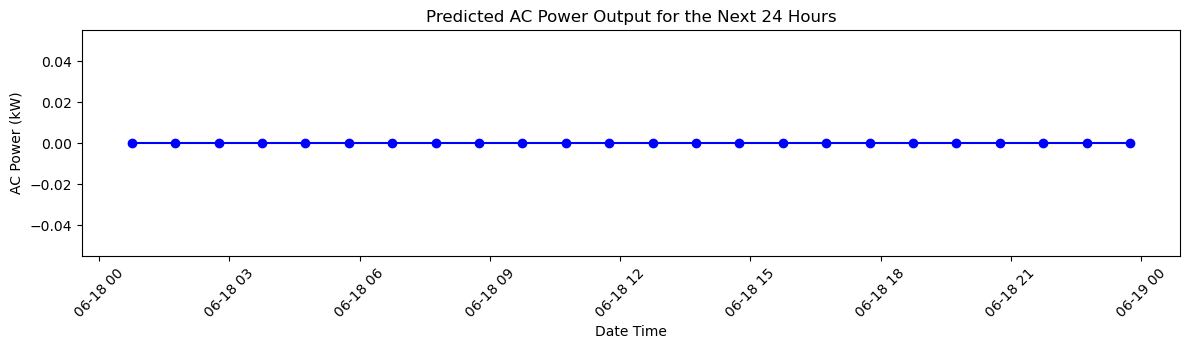

In [51]:
# Prepare the data
X = df_solar[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']]
y = df_solar['AC_POWER']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions for the next 24 hours and the next 7 days
import datetime

# Next 24 hours
current_datetime = pd.to_datetime(df_solar['DATE_TIME'].iloc[-1])  # Get the most recent datetime
next_24_hours = [current_datetime + datetime.timedelta(hours=i+1) for i in range(24)]  # Generate datetime for next 24 hours
next_24_hours_features = df_solar.iloc[-1][['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']].values.reshape(1, -1)
next_24_hours_predictions = []
for i in range(24):
    prediction = rf_model.predict(next_24_hours_features)
    next_24_hours_predictions.append(prediction[0])
    next_24_hours_features[0][-1] = prediction[0]  # Update DC_POWER with the predicted value

# Next 7 days
next_7_days = [current_datetime + datetime.timedelta(days=i+1) for i in range(7)]  # Generate datetime for next 7 days
next_7_days_features = df_solar.iloc[-1][['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'DC_POWER']].values.reshape(1, -1)
next_7_days_predictions = []
for i in range(7 * 24):
    prediction = rf_model.predict(next_7_days_features)
    next_7_days_predictions.append(prediction[0])
    next_7_days_features[0][-1] = prediction[0]  # Update DC_POWER with the predicted value
    if (i + 1) % 24 == 0:
        next_7_days_features[0][0] += 1  # Increment DAILY_YIELD for the next day

import matplotlib.pyplot as plt

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Next 24 hours
plt.subplot(2, 1, 1)
plt.plot(next_24_hours, next_24_hours_predictions, marker='o', linestyle='-', color='b')
plt.title('Predicted AC Power Output for the Next 24 Hours')
plt.xlabel('Date Time')
plt.ylabel('AC Power (kW)')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()


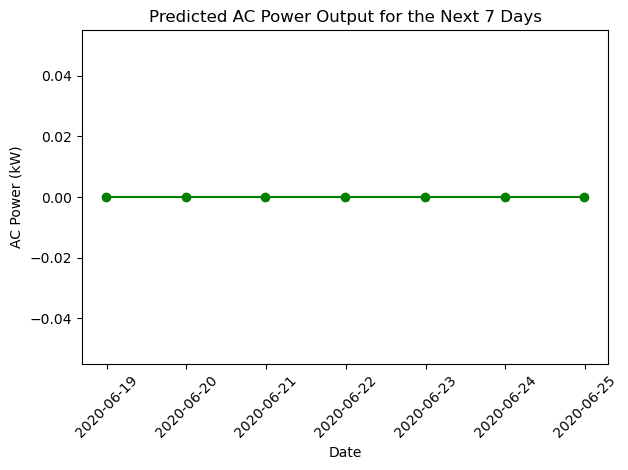

In [53]:
import numpy as np

# Aggregate predictions for each day
next_7_days_predictions_daily = [np.mean(next_7_days_predictions[i:i+24]) for i in range(0, len(next_7_days_predictions), 24)]

# Plot aggregated predictions for the next 7 days
plt.plot(next_7_days, next_7_days_predictions_daily, marker='o', linestyle='-', color='g')
plt.title('Predicted AC Power Output for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('AC Power (kW)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
